## Assignment: Exploratory Data Analysis on Facebook Utilization Data 

In [39]:
#importing all the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Load the data and impute missing values 

In [2]:
#loading the data into a pandas dataframe
user_df=pd.read_csv('C:\\Users\\hp\\Desktop\\ELDHOSE VARGHESE(DS)\\SHOWTIME CONSULTING\\facebookdata.csv')

In [3]:
user_df.head() #first 5 rows of the dataset

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [4]:
user_df.shape  #size of the dataset

(99003, 15)

In [5]:
user_df.info() #information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [6]:
user_df[user_df['gender'].isnull()]
# no:of missing values in gender column =175

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
3224,1781137,25,3,1988,1,NaN,203.0,1,1,1,0,1,0,0,0
4123,1110111,31,12,1982,1,NaN,227.0,2,2,0,0,0,0,0,0
5920,2000185,25,15,1988,2,NaN,239.0,4,4,0,0,0,0,0,0
6432,1137054,59,18,1954,2,NaN,2076.0,4,0,23,5,23,4,0,1
6870,1783336,62,5,1951,9,NaN,2047.0,5,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94778,1748557,68,27,1945,4,NaN,1862.0,790,435,422,425,410,318,12,107
95317,2173780,50,11,1963,9,NaN,2129.0,863,389,49,781,24,327,25,454
95479,1442490,108,1,1905,7,NaN,1332.0,967,537,150,1311,76,671,74,640
97530,2119521,74,26,1939,9,NaN,1998.0,1609,348,313,834,179,696,134,138


In [7]:
user_df[user_df['tenure'].isnull()] # no:of missing values in tenure column = 2

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
35057,1414063,88,14,1925,12,female,NaN,48,41,18,5,17,3,1,2
63979,2095829,103,1,1910,1,female,NaN,137,52,110,74,0,21,110,53


In [8]:
user_df.describe() #summary statistics

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [9]:
user_df['gender'].value_counts()

male      58574
female    40254
Name: gender, dtype: int64

In [10]:
user_df['gender'].mode()   # mode(gender)

0    male
dtype: object

In [11]:
user_df['gender'][49502]     # median(gender) ,(n+1/2 term)

'female'

In [12]:
user_df['tenure'].mode()     #mode(tenure)

0    300.0
dtype: float64

In [13]:
user_df['tenure'].median()   #median(tenure)

412.0

### if we replace the missing values(NAN) with mode it will lead to biasing or imbalance and  the insights from the data analysis will be less accurate, so we replace the missing values  with the median.

In [14]:
user_df['gender']=user_df['gender'].fillna(user_df['gender'][49502])

In [15]:
user_df['tenure']=user_df['tenure'].fillna(user_df['tenure'].median() )

In [16]:
user_df.info() #checking whether the missing values are filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 99003 non-null  object 
 6   tenure                 99003 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

## 2) Plot heatmap / correlation matrix on all the columns. 

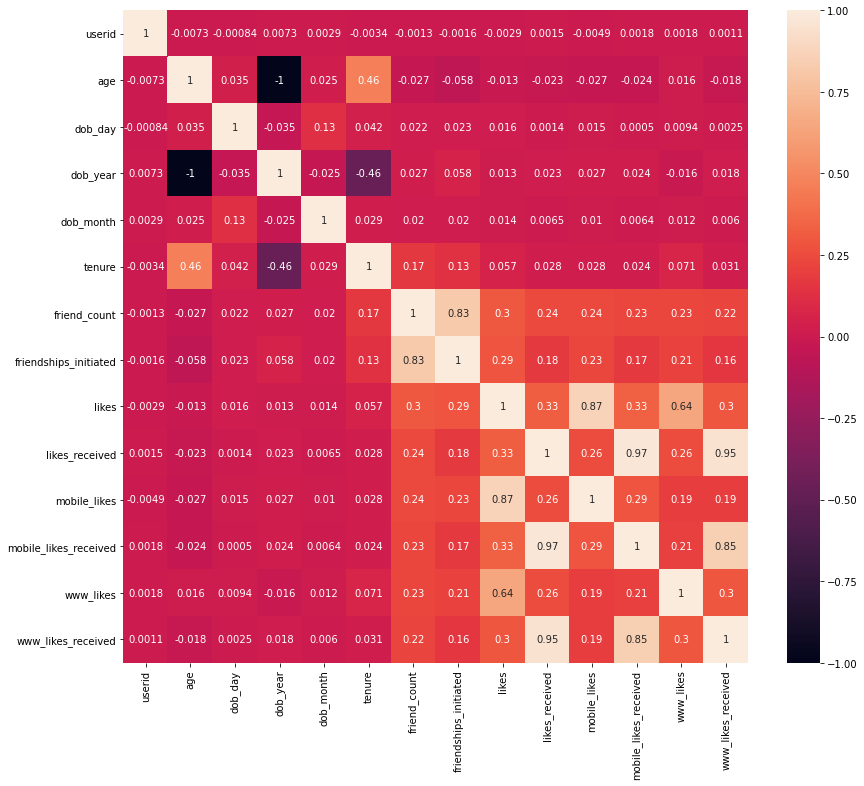

In [17]:
plt.subplots(figsize=(14,12))
sns.heatmap(user_df.corr(), annot=True)
plt.show()

## 3) Analysis based on gender of the users 

####  Q1:  What is composition of male and female users?

In [18]:
# Convert tenure to int64 type from float
user_df['tenure'] = user_df['tenure'].astype('int64')
# Convert gender column Object type to Category column type 
user_df['gender'] = user_df['gender'].astype('category')

In [19]:
user_df.groupby('gender').count()
#no:of female users = 40429
#no:of male users = 58574

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
gender,,,,,,,,,,,,,,
female,40429,40429,40429,40429,40429,40429,40429,40429,40429,40429,40429,40429,40429,40429
male,58574,58574,58574,58574,58574,58574,58574,58574,58574,58574,58574,58574,58574,58574


([<matplotlib.patches.Wedge at 0x254b9b66d60>,
 [Text(0.34071704988482837, -1.150613702298812, 'female'),
  Text(-0.34071704988482826, 1.150613702298812, 'male')],
 [Text(0.312323962394426, -1.0547292271072446, '41%'),
  Text(-0.31232396239442595, 1.0547292271072446, '59%')])

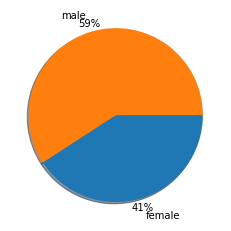

In [20]:
# composition of male and female users in percentage
tmp = user_df.groupby('gender').count()
plt.pie(tmp['age'], labels=['female', 'male'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, counterclock=False, shadow=True)

#### Q2: Which category of gender has more friends?

In [21]:
user_df.groupby('gender')['friend_count'].sum() # females have more friends compared to males

gender
female    9772530
male      9666787
Name: friend_count, dtype: int64

#### Q3: Which category of gender initiated more friendships? 

In [22]:
user_df.groupby('gender')['friendships_initiated'].sum()  # males initiated more friendships than females


gender
female    4601094
male      6037023
Name: friendships_initiated, dtype: int64

#### Q4: What is the distribution of tenure across different categories of gender? 

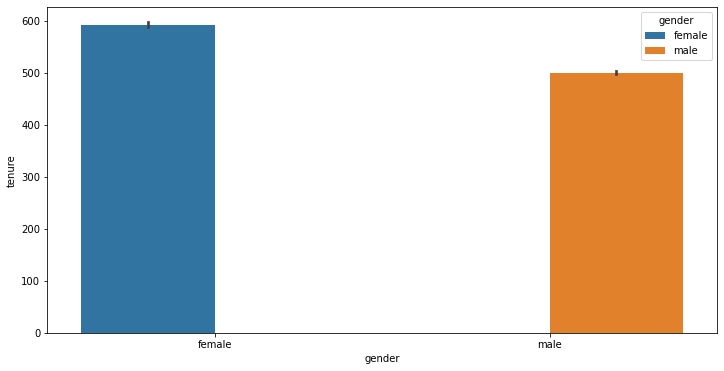

In [23]:
fig, ax1= plt.subplots(figsize=(12,6))
g = sns.barplot(x='gender', y='tenure', hue='gender', data=user_df, ax=ax1);

## 4) Analysis based on the least active users on Facebook

#### Q1: How many users have no friends? 

In [24]:
user_df['friend_count'] = user_df['friend_count'].astype('int64')

In [25]:
user_df[user_df['friend_count']==0]  # 1962 users have no friends

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,1395843,90,4,1923,7,male,0,0,0,95,78,95,56,0,22
1958,1306409,23,24,1990,1,male,48,0,0,164,0,164,0,0,0
1959,1838179,18,29,1995,10,female,0,0,0,246,100,0,9,246,91
1960,1594192,63,1,1950,1,female,57,0,0,271,1,271,0,0,1


#### Q2: How many users did not like any posts?

In [26]:
user_df[user_df['likes']==0] # 22308 users did not like any post

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98029,1792910,86,6,1927,9,male,610,4759,994,0,8,0,7,0,1
98030,1267270,98,29,1915,12,female,1293,3483,386,0,8,0,5,0,3
98031,1978609,103,4,1910,3,female,636,2129,640,0,2,0,2,0,0
98032,1130147,103,1,1910,4,male,1210,1965,856,0,4,0,2,0,2


#### Q3: How many users did not receive any likes?

In [27]:
user_df[user_df['likes_received']==0]        # 24428 users did not receive  any likes

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98005,1883270,18,14,1995,11,female,341,2050,467,0,0,0,0,0,0
98016,1993020,21,8,1992,1,male,1262,1954,1050,0,0,0,0,0,0
98061,1680023,17,13,1996,10,female,736,2415,1795,3,0,0,0,3,0
98081,2022131,16,14,1997,8,male,743,2294,1157,6,0,6,0,0,0


## 5) Analysis based on the user accessibility (Mobile Devices vs. Web Devices)

#### Q1: What is the average number of posts liked by users (based on gender) through web vs mobile devices?


In [28]:
user_df.groupby('gender')['mobile_likes'].mean()
#average no:of posts liked by females through mobiles = 172
#average no:of posts liked by males through mobiles = 60

gender
female    172.551510
male       60.261328
Name: mobile_likes, dtype: float64

In [29]:
user_df.groupby('gender')['www_likes'].mean()
#average no:of posts liked by females through web devices = 87
#average no:of posts liked by males through web devices = 24

gender
female    86.973583
male      24.416550
Name: www_likes, dtype: float64

#### Q2: What is the average number of likes received by users (based on gender) through web vs mobile devices?


In [30]:
user_df.groupby('gender')['mobile_likes_received'].mean()
#average no:of likes received by females through mobiles = 147
#average no:of likes received by males through mobiles = 41

gender
female    146.835885
male       40.833015
Name: mobile_likes_received, dtype: float64

In [31]:
user_df.groupby('gender')['www_likes_received'].mean()
#average no:of likes received by females through web devices = 104
#average no:of likes received by males through web devices = 27

gender
female    104.192337
male       27.078533
Name: www_likes_received, dtype: float64

## Key Insights

In [32]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (20,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

AGE ANALYSIS - Exploring which age group uses more facebook comparatively and we clearly see that teenagers are more using facebook comparatively to others

<AxesSubplot:xlabel='age', ylabel='count'>

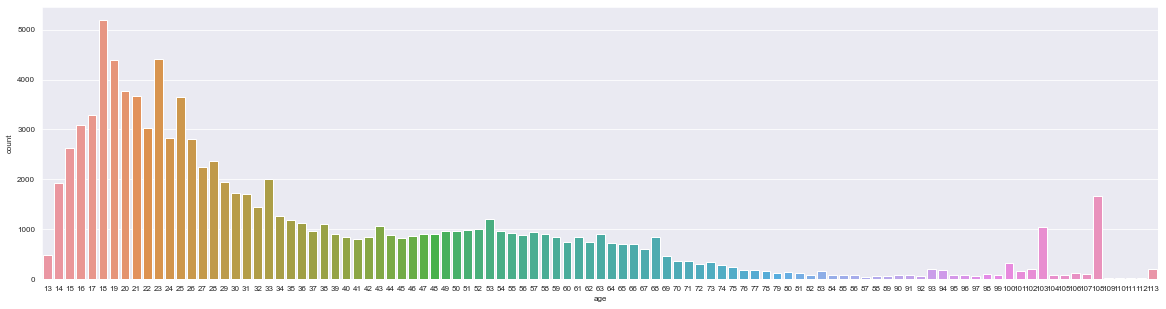

In [33]:
sns.countplot(x='age',data=user_df)

In [34]:
user_df['age'].value_counts()[:5]  # Most of the users have an age of 18

18    5196
23    4404
19    4391
20    3769
21    3671
Name: age, dtype: int64

In [36]:
user_df['age'].max() #oldest user

113

In [37]:
user_df['age'].min() #youngest user

13

In [51]:
labels2 = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80','81-90','91-100','101-110','111-120']
user_df['age_group'] = pd.cut(user_df.age, [10,20,30,40,50,60,70,80,90,100,110,120], right=True, labels=labels2)
user_df['age_group'] = user_df['age_group'].astype('category')

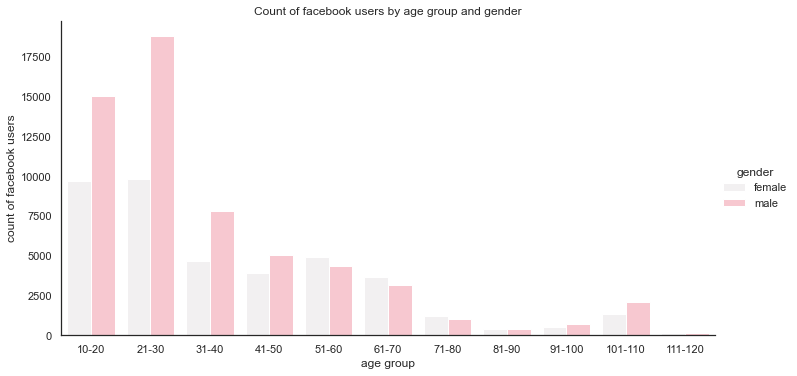

In [58]:
with sns.axes_style('white'):
    g = sns.factorplot("age_group", data=user_df, aspect=2,
                       kind="count", hue="gender", color='pink') 

plt.title("Count of facebook users by age group and gender")
plt.ylabel('count of facebook users')
plt.xlabel('age group');
plt.show()

Likes analysis according to gender and age

<AxesSubplot:xlabel='age', ylabel='likes'>

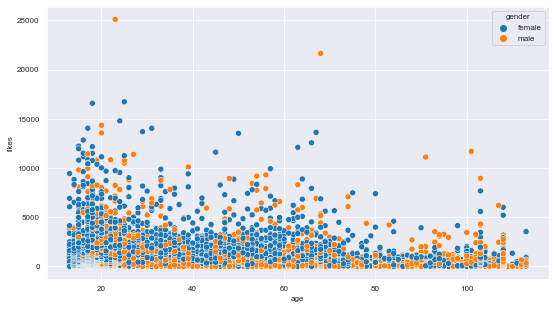

In [35]:
matplotlib.rcParams['figure.figsize'] = (9,5)
sns.scatterplot(x="age", y="likes", hue="gender",data=user_df)

Distribution of mobile likes according to age group

In [40]:
labels=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
user_df['age_group'] = pd.cut(user_df.age,bins=np.arange(10,121,10),labels=labels,right=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'MOBILE LIKES BY AGE GROUP')

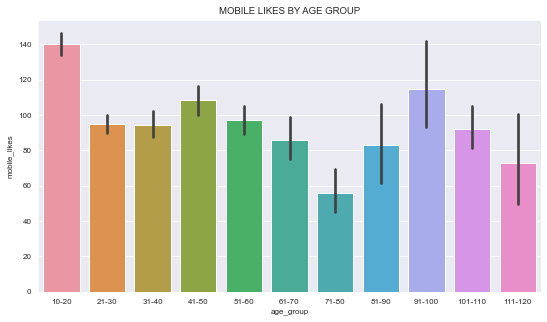

In [41]:
sns.barplot(user_df['age_group'],user_df['mobile_likes'])
plt.title("MOBILE LIKES BY AGE GROUP")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'WEB LIKES BY AGE GROUP')

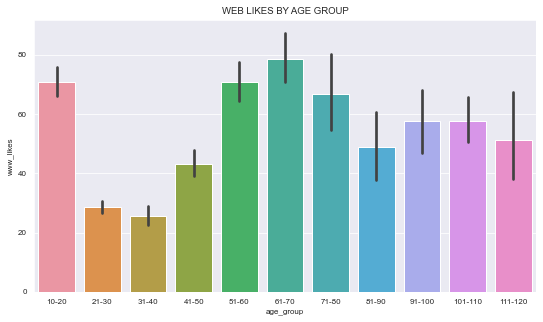

In [42]:
sns.barplot(user_df['age_group'],user_df['www_likes'])
plt.title("WEB LIKES BY AGE GROUP")

From this we came to know that 51-70 age group uses website for using facebook and around age group between 10-20 uses the mobile app.

#### Analysing the friend count with reference to age group 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'FRIEND COUNT BY AGE GROUP')

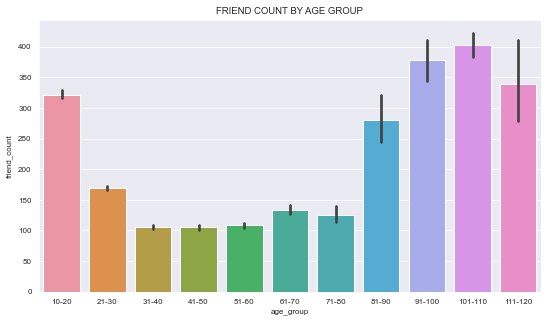

In [43]:
sns.barplot(user_df['age_group'],user_df['friend_count'])
plt.title('FRIEND COUNT BY AGE GROUP')

#### Analysing the friend count with reference to age group and gender

<AxesSubplot:xlabel='age_group', ylabel='friend_count'>

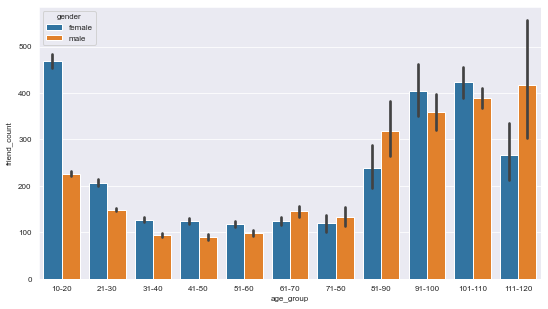

In [44]:
sns.barplot(x=user_df['age_group'],y=user_df['friend_count'],hue=user_df.gender)

In [47]:
user_df['tenure'].min()

0

In [46]:
user_df['tenure'].max()

3139

### count of users by tenure group

In [48]:
labels1 = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700','701-800','801-900','901-1000','1001-1100', '1101-1200','1201-1300','1301-1400','1401-1500','1501-1600','1601-1700','1701-1800','1801-1900','1901-2000', '2001-3200']
user_df['tenure_group'] = pd.cut(user_df.tenure, [-1,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,3200], right=True, labels=labels1)

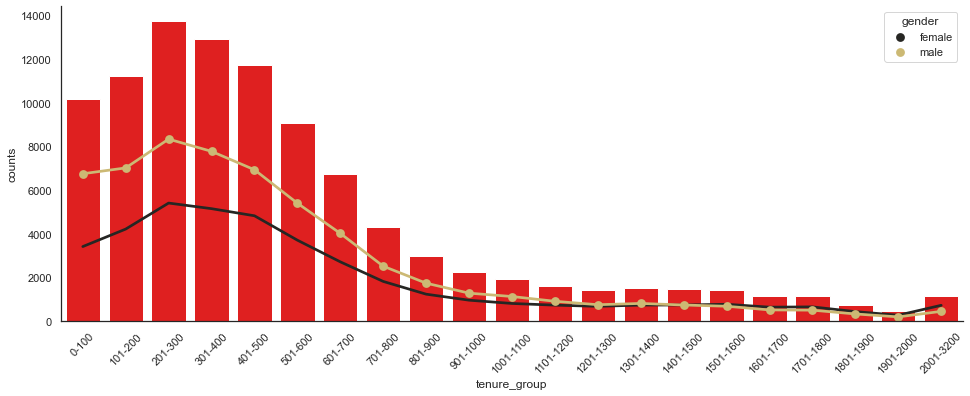

In [59]:
df_groupedBytenure = user_df.groupby(['tenure_group',"gender"]).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(12,5))
with sns.axes_style('white'):
    g = sns.factorplot("tenure_group", data=user_df, aspect=2.7,
                       kind="count", color='red') 
    sns.pointplot(x='tenure_group', y='counts',hue="gender", data=df_groupedBytenure, color='y')
for tick in g.ax.get_xticklabels():
    tick.set_rotation(45)
plt.close(1)

From the above plot we came to know that people with a tenure of (201-300) days are the most and within that males are more.

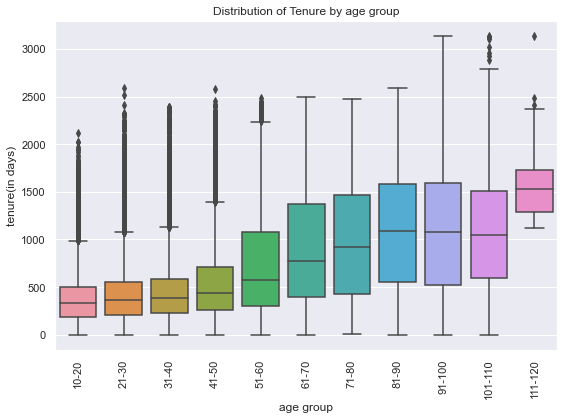

In [60]:
fig, ax = plt.subplots(figsize=(8,6))
g = sns.boxplot(x="age_group", y="tenure", data=user_df); 
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title("Distribution of Tenure by age group")
plt.xlabel('age group');
plt.ylabel('tenure(in days)');
plt.tight_layout()
plt.show()

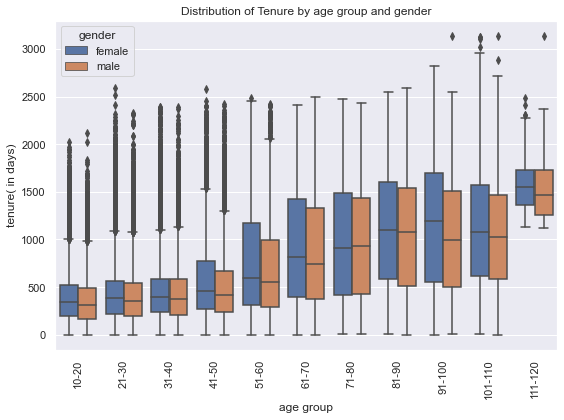

In [61]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="age_group", y="tenure", hue="gender", data=user_df);
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title("Distribution of Tenure by age group and gender")
plt.xlabel('age group');
plt.ylabel('tenure( in days)');
plt.tight_layout()
plt.show()

In [63]:
user_df['friend_count'].value_counts()

0       1962
1       1816
2       1117
3        860
5        789
        ... 
1808       1
1744       1
3729       1
1680       1
2047       1
Name: friend_count, Length: 2562, dtype: int64

In [64]:
# created sub group of Friend_count between 0 to 2600 as it covers 99% of User population.
labels3 = ['0-200', '201-400', '401-600', '601-800', '801-1000', '1001-1200', '1201-1400','1401-1600','1601-1800','1801-2000','2001-2200', '2201-2400','2401-2600']
user_df['friend_count_subgroup'] = pd.cut(user_df.friend_count, [-1,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600], right=True, labels=labels3)

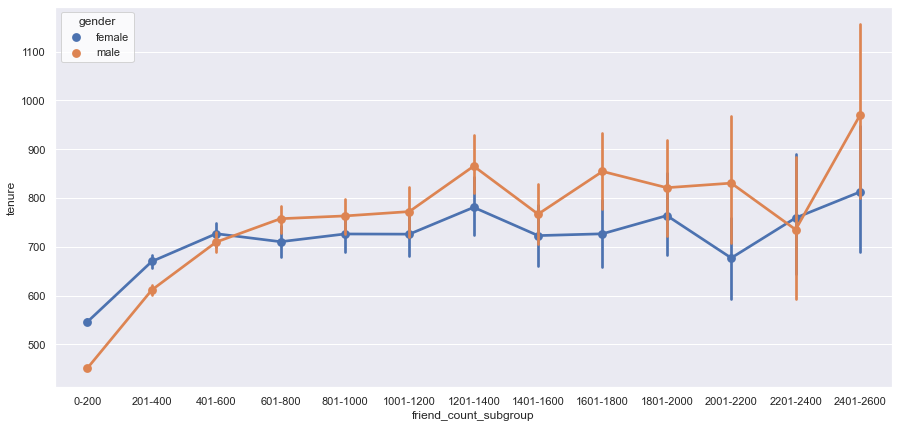

In [65]:
fig, ax = plt.subplots(figsize=(15,7))
with sns.axes_style('white'):
    sns.pointplot(x='friend_count_subgroup', y='tenure', hue='gender', data=user_df);

From above plot we came to know that females took less time to reach 2400 friends

Text(0.5, 1.0, 'Friend count subgroup Vs likes(Green), mobile_likes(Blue) & www_likes(coral)')

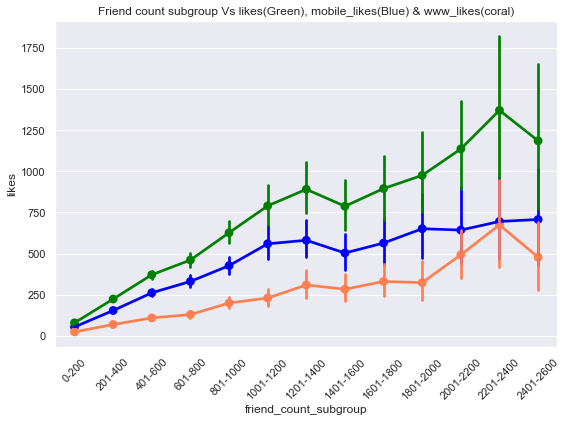

In [66]:
fig, ax = plt.subplots(figsize=(9,6)) 
#with sns.axes_style('white'):
sns.pointplot(x='friend_count_subgroup', y='mobile_likes', data=user_df,color='blue',labels='mobile_likes',legend=True); 
sns.pointplot(x='friend_count_subgroup', y='www_likes', data=user_df,color='coral',labels='www_likes',legend=True);
sns.pointplot(x='friend_count_subgroup', y='likes', data=user_df,color='green', labels="likes",legend=True);
for tick in ax.get_xticklabels():
            tick.set_rotation(45)
plt.title('Friend count subgroup Vs likes(Green), mobile_likes(Blue) & www_likes(coral)')

Text(0.5, 1.0, 'Friend count subgroup Vs likes_received(Green), mobile_likes_received(Blue) & www_likes_received(coral)')

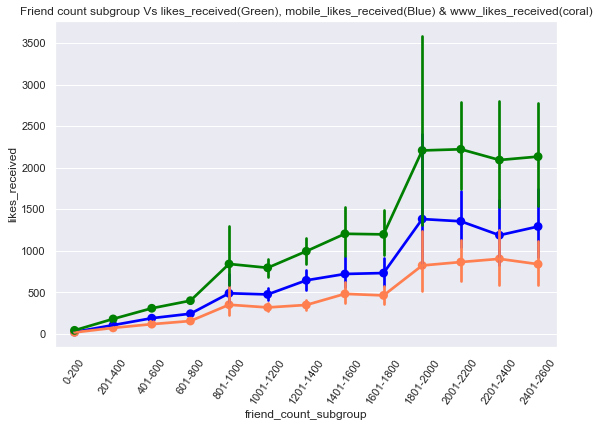

In [67]:
fig, ax = plt.subplots(figsize=(9,6))
#with sns.axes_style('white'):
sns.pointplot(x='friend_count_subgroup', y='mobile_likes_received', data=user_df,color='blue',labels='mobile_likes_received',legend=True); 
sns.pointplot(x='friend_count_subgroup', y='www_likes_received',data=user_df,color='coral',labels='www_likes_received',legend=True);
sns.pointplot(x='friend_count_subgroup', y='likes_received', data=user_df, color='green', labels="likes_received",legend=True);
for tick in ax.get_xticklabels():
            tick.set_rotation(55)
plt.title('Friend count subgroup Vs likes_received(Green), mobile_likes_received(Blue) & www_likes_received(coral)')

In [69]:
labels4 = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700','701-800','801-900','901-1000','1001-1100', '1101-1200','1201-1300','1301-1400','1401-1500','1501-1600','1601-1700','1701-1800','1801-1900','1901-2000', '2001-3200']
user_df['tenure_subgroup'] = pd.cut(user_df.tenure, [-1,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,3200], right=True, labels=labels4)

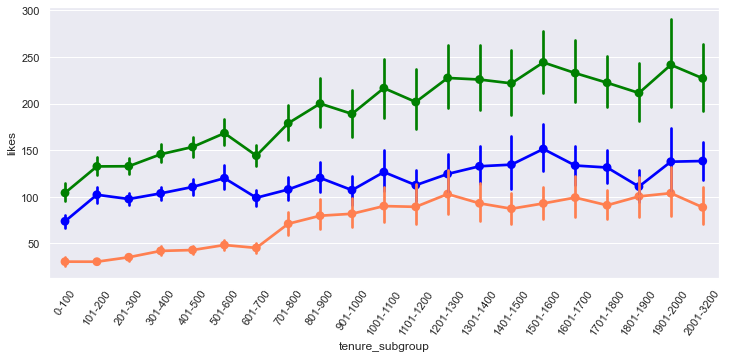

In [70]:
fig, ax = plt.subplots(figsize=(12,5))
sns.pointplot(x='tenure_subgroup', y='mobile_likes', data=user_df,color='blue',labels='mobile_likes',legend=True); 
sns.pointplot(x='tenure_subgroup', y='www_likes', data=user_df,color='coral',labels='www_likes',legend=True);
sns.pointplot(x='tenure_subgroup', y='likes',data=user_df,color='green',labels="likes",legend=True); 
for tick in ax.get_xticklabels():
    tick.set_rotation(55)

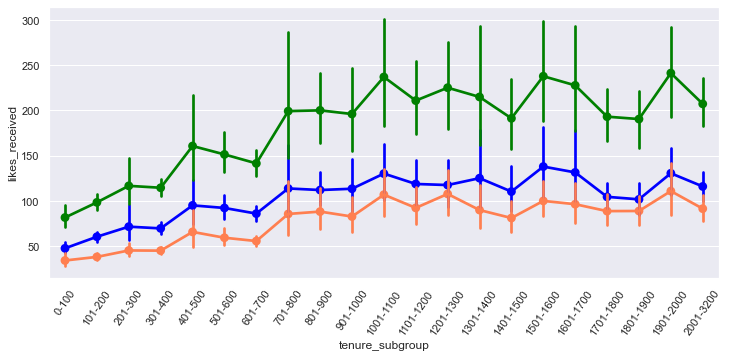

In [71]:
fig, ax = plt.subplots(figsize=(12,5))
sns.pointplot(x='tenure_subgroup', y='mobile_likes_received', data=user_df,color='blue',labels='mobile_likes_received',legend=True); 
sns.pointplot(x='tenure_subgroup', y='www_likes_received', data=user_df,color='coral',labels='www_likes_received',legend=True);
sns.pointplot(x='tenure_subgroup', y='likes_received',data=user_df,color='green', labels="likes_received",legend=True);
for tick in ax.get_xticklabels():
    tick.set_rotation(55)

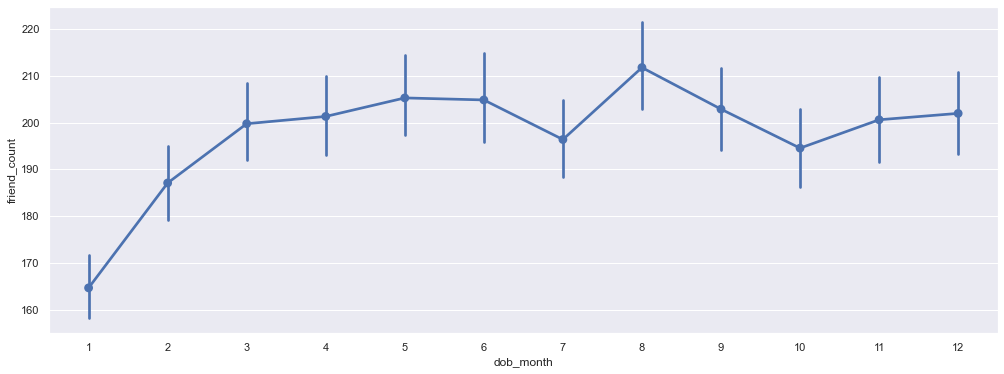

In [72]:
fig, ax = plt.subplots(figsize=(17,6))
with sns.axes_style('white'):
    sns.pointplot(y='friend_count', x='dob_month', data=user_df);

Users born in the month of august seems to have more friends